# Rocket-landing

$$
\begin{aligned}
\min _{T,\ \delta} \quad & -m_{f}\\
\text { s.t. } \quad & \dot{r}_{x}=v_{x}\\
&\dot{r}_{y}=v_{y}\\
&\dot{v}_{x}=-\tfrac{T}{m} \sin (\theta+\delta)\\
&\dot{v}_{y}=\tfrac{T}{m} \cos (\theta+\delta)-g\\
&\dot{\theta}=\omega\\
&\dot{\omega}=\tfrac{-(T \sin \delta) L}{J}\\
&\dot{m}=-\alpha T\\
&r_{y} \geq\left|r_{x}\right| \tan \psi\\
&T_{\min } \leq T \leq T_{\max }\\
&-\delta_{\max } \leq \delta \leq \delta_{\max }\\
&r_{x_{i}}=r_{x_{\text {init }}},\ r_{y_{i}}=r_{y_{\text {init }}}\\
&v_{x_{i}}=v_{x_{\text {init }}},\ v_{y_{i}}=v_{y_{\text {init }}}\\
&\theta_{i}=\theta_{\text {init }}\\
&\omega_{i}=\omega_{\text {init }}\\
&r_{x_{f}}=r_{y_{f}}=v_{x_{f}}=v_{y_{f}}=\theta_{f}=w_{f}=0
\end{aligned}
$$

## Symbolic computation of Jacobians

In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

### Constants

In [2]:
L = sm.symbols('L') # lever-arm
g = sm.symbols('g') # gravitational acceleration
alpha = sm.symbols('alpha') # thrust-specific fuel consumption (TSFC)
J = sm.symbols('J') # moment of inertia

### Variables

In [3]:
t = me.dynamicsymbols._t
tf = me.dynamicsymbols('t_f')
rx, ry, theta = me.dynamicsymbols('r_x, r_y, theta')
m = me.dynamicsymbols('m')
vx, vy, omega = me.dynamicsymbols('v_x, v_y, omega')
T, delta = me.dynamicsymbols('T, delta')

In [4]:
gen_coords = sm.Matrix([rx, ry, theta])
ndof = len(gen_coords)
gen_speeds = sm.Matrix([vx, vy, omega])
m_ = sm.Matrix([m])

In [5]:
# states = gen_coords.col_join(gen_speeds).col_join(m_)
# states

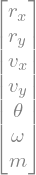

In [6]:
states = sm.Matrix([rx, ry, vx, vy, theta, omega, m])
states

In [7]:
controls = sm.Matrix([T, delta])
controls

### Kinematics

#### LHS

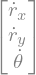

In [8]:
gen_coords.diff()

#### RHS

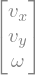

In [9]:
gen_speeds

### Dynamics

#### LHS

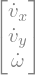

In [10]:
gen_speeds.diff()

#### RHS

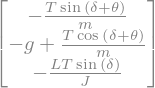

In [11]:
vx_dot = -(T/m) * sm.sin(theta + delta)
vy_dot = (T/m) * sm.cos(theta + delta) - g
omega_dot = -(T * sm.sin(delta) * L)/J
f_ = sm.Matrix([vx_dot, vy_dot, omega_dot])
f_

In [12]:
f_ = sm.Matrix([vx, vy, vx_dot, vy_dot, omega, omega_dot])

#### Mass-depletion

#### LHS

In [13]:
m.diff()

#### RHS

In [14]:
m_dot = -alpha*T
m_dot

### ODE RHS

$$\dot{x}(t) = \color{#009670}{f(t, x, u, p)}$$

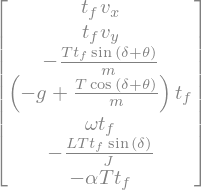

In [15]:
# f = tf*gen_speeds.col_join(f_).col_join(sm.Matrix([m_dot]))
f = tf*f_.col_join(sm.Matrix([m_dot]))
f

### Jacobians

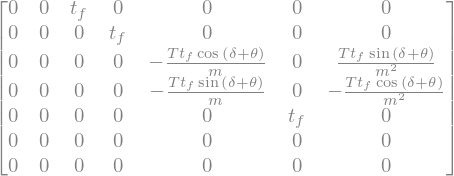

In [16]:
A = f.jacobian(states)
A

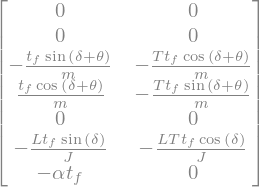

In [17]:
B = f.jacobian(controls)
B

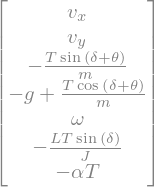

In [18]:
F = f.jacobian([tf])
F